# Covid-19 Data Analysis

This a data analysis of the covid 19 outbread that had hit the world in late 2019. Coronavirus is a deadly disease that has stunned the whole world and has disrupted the normal scenario. The world was in a state of lockdown for more than a year. Here I try to analyse the Covid-19 world data as best as I can. 

Data source - https://www.worldometers.info/coronavirus/

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

#### Loading Data

In [2]:
covid_df = pd.read_csv("covid_world_data_2.csv")

In [3]:
covid_df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests
0,USA,45313353,NaN,734611.0,NaN,34797165.0,NaN,9781577.0,659963506.0
1,India,33985920,1441.0,450991.0,NaN,33320057.0,7606.0,214872.0,585038043.0
2,Brazil,21582738,NaN,601266.0,NaN,20694669.0,NaN,286803.0,63776166.0
3,UK,8193769,NaN,137763.0,NaN,6686695.0,NaN,1369311.0,314239784.0
4,Russia,7804774,NaN,217372.0,NaN,6873579.0,NaN,713823.0,197200000.0
...,...,...,...,...,...,...,...,...,...
218,Vanuatu,4,NaN,1.0,NaN,3.0,NaN,0.0,23000.0
219,Marshall Islands,4,NaN,NaN,NaN,4.0,NaN,0.0,NaN
220,Samoa,3,NaN,NaN,NaN,3.0,NaN,0.0,NaN
221,Saint Helena,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN


In [4]:
covid_df.shape

(223, 9)

In [5]:
covid_df.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Total Tests'],
      dtype='object')

By looking at the dataset shape we can say that the dataset consists of 223 rows and 9 columns. Each row represent the covid 19 data of a unique country. So, there are 223 unique countries.

In [6]:
# Checking the different countries 
covid_df.Country.unique()

array(['USA', 'India', 'Brazil', 'UK', 'Russia', 'Turkey', 'France',
       'Iran', 'Argentina', 'Spain', 'Colombia', 'Italy', 'Germany',
       'Indonesia', 'Mexico', 'Poland', 'South Africa', 'Philippines',
       'Ukraine', 'Malaysia', 'Peru', 'Netherlands', 'Iraq', 'Thailand',
       'Japan', 'Czechia', 'Chile', 'Canada', 'Bangladesh', 'Romania',
       'Israel', 'Belgium', 'Pakistan', 'Sweden', 'Portugal', 'Serbia',
       'Morocco', 'Cuba', 'Kazakhstan', 'Switzerland', 'Vietnam',
       'Jordan', 'Hungary', 'Nepal', 'Austria', 'UAE', 'Tunisia',
       'Greece', 'Georgia', 'Lebanon', 'Guatemala', 'Belarus',
       'Saudi Arabia', 'Costa Rica', 'Sri Lanka', 'Bulgaria', 'Ecuador',
       'Bolivia', 'Azerbaijan', 'Myanmar', 'Panama', 'Paraguay',
       'Slovakia', 'Croatia', 'Palestine', 'Kuwait', 'Ireland', 'Uruguay',
       'Venezuela', 'Honduras', 'Dominican Republic', 'Denmark',
       'Ethiopia', 'Lithuania', 'Libya', 'S. Korea', 'Mongolia', 'Egypt',
       'Moldova', 'Oman', 'S

Let us replace all the Nan values with 0 so that it does not create error while performing mathematical operations. Here, Nan does not mean 0 but as because there is no data available we are assuming it as 0. 

In [7]:
covid_df1 = covid_df.fillna(0)
covid_df1

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests
0,USA,45313353,0.0,734611.0,0.0,34797165.0,0.0,9781577.0,659963506.0
1,India,33985920,1441.0,450991.0,0.0,33320057.0,7606.0,214872.0,585038043.0
2,Brazil,21582738,0.0,601266.0,0.0,20694669.0,0.0,286803.0,63776166.0
3,UK,8193769,0.0,137763.0,0.0,6686695.0,0.0,1369311.0,314239784.0
4,Russia,7804774,0.0,217372.0,0.0,6873579.0,0.0,713823.0,197200000.0
...,...,...,...,...,...,...,...,...,...
218,Vanuatu,4,0.0,1.0,0.0,3.0,0.0,0.0,23000.0
219,Marshall Islands,4,0.0,0.0,0.0,4.0,0.0,0.0,0.0
220,Samoa,3,0.0,0.0,0.0,3.0,0.0,0.0,0.0
221,Saint Helena,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0


### Let's check the total number of confirmed cases, deaths and Recovered cases in World


First let us see the type of data in each column.

In [8]:
covid_df1.dtypes

Country             object
Total Cases          int64
New Cases          float64
Total Deaths       float64
New Deaths         float64
Total Recovered    float64
New Recovered      float64
Active Cases       float64
Total Tests        float64
dtype: object

Here, we see that all the columns except the Country are numeric type. 

In [9]:
confirmed = covid_df1['Total Cases'].sum() + covid_df1['New Cases'].sum() 
recovered = covid_df1['Total Recovered'].sum() + covid_df1['New Recovered'].sum()
deaths = covid_df1['Total Deaths'].sum() + covid_df1['New Deaths'].sum()

In [10]:
print("Total Confirmed Cases =" ,confirmed)
print("Total Recovered Cases =" ,recovered)
print("Total Deaths =" ,deaths)

Total Confirmed Cases = 239059206.0
Total Recovered Cases = 214620044.0
Total Deaths = 4873121.0


We can visualize this using a pie chart. 

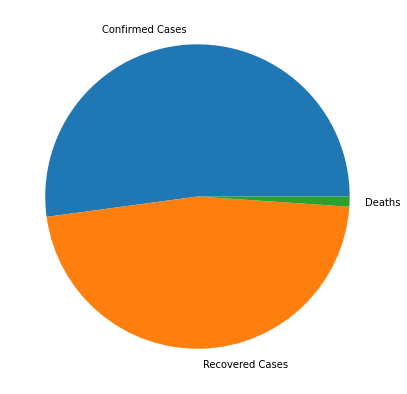

In [11]:
label = ['Confirmed Cases','Recovered Cases','Deaths']
values = [confirmed , recovered, deaths]

fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = label)

plt.show()

From, the above visualisation we can say that out of the total confirmed cases most of the patients has recovered and only a small pecent of the patients have died. 

Now let us calculate the percentage of death and recovered among the confirmed cases.

In [12]:
recovered_percentage = recovered/confirmed * 100
death_percentage = deaths/confirmed * 100

In [13]:
print("Death Pecentage =" ,death_percentage)
print("Recovered Pecentage =" ,recovered_percentage)

Death Pecentage = 2.0384577868965232
Recovered Pecentage = 89.77694170037526


As we can see only 2 percent of total confirmed cases has died and 89 percent have recovered from the illness. 
Although the death percetage is low the way Covid-19 spread and attacks human is something uncomparable. It spreads like a fire and hence the even though the percentage of deaths is low but the total number of deaths is not low, because the total number of confirmed cases is a huge number. 

### Let us add a column in our dataset which will store the positivity rate, death reate and recovery rate of each country

At first let us create 3 columns that will have values of total cases, total deaths and total recoveries. 

In [14]:
covid_df1["new_total_cases"] = covid_df1["Total Cases"] + covid_df1["New Cases"]
covid_df1["new_total_deaths"] = covid_df1["Total Deaths"] + covid_df1["New Deaths"]
covid_df1["new_total_recoveries"] = covid_df1["Total Recovered"] + covid_df1["New Recovered"]

In [17]:
covid_df1["positivity_rate"] = covid_df1["new_total_cases"] / covid_df1["Total Tests"]
covid_df1["death_rate"] = covid_df1["new_total_deaths"] / covid_df1["new_total_cases"]
covid_df1["recovery_rate"] = covid_df1["new_total_recoveries"] / covid_df1["new_total_cases"]

In [18]:
covid_df1

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests,new_total_cases,new_total_deaths,new_total_recoveries,positivity_rate,death_rate,recovery_rate
0,USA,45313353,0.0,734611.0,0.0,34797165.0,0.0,9781577.0,659963506.0,45313353.0,734611.0,34797165.0,0.068660,0.016212,0.767923
1,India,33985920,1441.0,450991.0,0.0,33320057.0,7606.0,214872.0,585038043.0,33987361.0,450991.0,33327663.0,0.058094,0.013269,0.980590
2,Brazil,21582738,0.0,601266.0,0.0,20694669.0,0.0,286803.0,63776166.0,21582738.0,601266.0,20694669.0,0.338414,0.027859,0.958853
3,UK,8193769,0.0,137763.0,0.0,6686695.0,0.0,1369311.0,314239784.0,8193769.0,137763.0,6686695.0,0.026075,0.016813,0.816071
4,Russia,7804774,0.0,217372.0,0.0,6873579.0,0.0,713823.0,197200000.0,7804774.0,217372.0,6873579.0,0.039578,0.027851,0.880689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Vanuatu,4,0.0,1.0,0.0,3.0,0.0,0.0,23000.0,4.0,1.0,3.0,0.000174,0.250000,0.750000
219,Marshall Islands,4,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,inf,0.000000,1.000000
220,Samoa,3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,inf,0.000000,1.000000
221,Saint Helena,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,inf,0.000000,1.000000


### Top 10 countries with highest cases

In [31]:
covid_df1.sort_values('new_total_cases', ascending=False).head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests,new_total_cases,new_total_deaths,new_total_recoveries,positivity_rate,death_rate,recovery_rate
0,USA,45313353,0.0,734611.0,0.0,34797165.0,0.0,9781577.0,659963506.0,45313353.0,734611.0,34797165.0,0.068660,0.016212,0.767923
1,India,33985920,1441.0,450991.0,0.0,33320057.0,7606.0,214872.0,585038043.0,33987361.0,450991.0,33327663.0,0.058094,0.013269,0.980590
2,Brazil,21582738,0.0,601266.0,0.0,20694669.0,0.0,286803.0,63776166.0,21582738.0,601266.0,20694669.0,0.338414,0.027859,0.958853
3,UK,8193769,0.0,137763.0,0.0,6686695.0,0.0,1369311.0,314239784.0,8193769.0,137763.0,6686695.0,0.026075,0.016813,0.816071
4,Russia,7804774,0.0,217372.0,0.0,6873579.0,0.0,713823.0,197200000.0,7804774.0,217372.0,6873579.0,0.039578,0.027851,0.880689
5,Turkey,7475115,0.0,66368.0,0.0,6927337.0,0.0,481410.0,90202990.0,7475115.0,66368.0,6927337.0,0.082870,0.008879,0.926720
6,France,7057631,0.0,117082.0,0.0,6847617.0,0.0,92932.0,146046715.0,7057631.0,117082.0,6847617.0,0.048324,0.016589,0.970243
7,Iran,5716394,0.0,122868.0,0.0,5234010.0,0.0,359516.0,32619228.0,5716394.0,122868.0,5234010.0,0.175246,0.021494,0.915614
8,Argentina,5266275,0.0,115491.0,0.0,5133692.0,0.0,17092.0,24252818.0,5266275.0,115491.0,5133692.0,0.217141,0.021930,0.974824
9,Spain,4977448,0.0,86827.0,0.0,4816194.0,0.0,74427.0,66213858.0,4977448.0,86827.0,4816194.0,0.075172,0.017444,0.967603


### Top 10 contries with highest deaths

In [30]:
covid_df1.sort_values('new_total_deaths', ascending=False).head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests,new_total_cases,new_total_deaths,new_total_recoveries,positivity_rate,death_rate,recovery_rate
0,USA,45313353,0.0,734611.0,0.0,34797165.0,0.0,9781577.0,659963506.0,45313353.0,734611.0,34797165.0,0.068660,0.016212,0.767923
2,Brazil,21582738,0.0,601266.0,0.0,20694669.0,0.0,286803.0,63776166.0,21582738.0,601266.0,20694669.0,0.338414,0.027859,0.958853
1,India,33985920,1441.0,450991.0,0.0,33320057.0,7606.0,214872.0,585038043.0,33987361.0,450991.0,33327663.0,0.058094,0.013269,0.980590
14,Mexico,3725242,2007.0,282227.0,141.0,3088055.0,6136.0,354960.0,10912276.0,3727249.0,282368.0,3094191.0,0.341565,0.075758,0.830154
4,Russia,7804774,0.0,217372.0,0.0,6873579.0,0.0,713823.0,197200000.0,7804774.0,217372.0,6873579.0,0.039578,0.027851,0.880689
20,Peru,2184676,0.0,199703.0,0.0,0.0,0.0,0.0,18289317.0,2184676.0,199703.0,0.0,0.119451,0.091411,0.000000
13,Indonesia,4228552,0.0,142716.0,0.0,4063295.0,0.0,22541.0,41849489.0,4228552.0,142716.0,4063295.0,0.101042,0.033751,0.960919
3,UK,8193769,0.0,137763.0,0.0,6686695.0,0.0,1369311.0,314239784.0,8193769.0,137763.0,6686695.0,0.026075,0.016813,0.816071
11,Italy,4701832,0.0,131335.0,0.0,4486391.0,0.0,84106.0,95445947.0,4701832.0,131335.0,4486391.0,0.049262,0.027933,0.954179
10,Colombia,4973325,0.0,126655.0,0.0,4816568.0,0.0,30102.0,26011131.0,4973325.0,126655.0,4816568.0,0.191200,0.025467,0.968480


### Top 10 countries with highest recoveries

In [26]:
covid_df1.sort_values('new_total_recoveries', ascending=False).head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests,new_total_cases,new_total_deaths,new_total_recoveries,positivity_rate,death_rate,recovery_rate
0,USA,45313353,0.0,734611.0,0.0,34797165.0,0.0,9781577.0,659963506.0,45313353.0,734611.0,34797165.0,0.068660,0.016212,0.767923
1,India,33985920,1441.0,450991.0,0.0,33320057.0,7606.0,214872.0,585038043.0,33987361.0,450991.0,33327663.0,0.058094,0.013269,0.980590
2,Brazil,21582738,0.0,601266.0,0.0,20694669.0,0.0,286803.0,63776166.0,21582738.0,601266.0,20694669.0,0.338414,0.027859,0.958853
5,Turkey,7475115,0.0,66368.0,0.0,6927337.0,0.0,481410.0,90202990.0,7475115.0,66368.0,6927337.0,0.082870,0.008879,0.926720
4,Russia,7804774,0.0,217372.0,0.0,6873579.0,0.0,713823.0,197200000.0,7804774.0,217372.0,6873579.0,0.039578,0.027851,0.880689
6,France,7057631,0.0,117082.0,0.0,6847617.0,0.0,92932.0,146046715.0,7057631.0,117082.0,6847617.0,0.048324,0.016589,0.970243
3,UK,8193769,0.0,137763.0,0.0,6686695.0,0.0,1369311.0,314239784.0,8193769.0,137763.0,6686695.0,0.026075,0.016813,0.816071
7,Iran,5716394,0.0,122868.0,0.0,5234010.0,0.0,359516.0,32619228.0,5716394.0,122868.0,5234010.0,0.175246,0.021494,0.915614
8,Argentina,5266275,0.0,115491.0,0.0,5133692.0,0.0,17092.0,24252818.0,5266275.0,115491.0,5133692.0,0.217141,0.021930,0.974824
10,Colombia,4973325,0.0,126655.0,0.0,4816568.0,0.0,30102.0,26011131.0,4973325.0,126655.0,4816568.0,0.191200,0.025467,0.968480


### Top 10 countries with lowest cases

In [27]:
covid_df1.sort_values('new_total_cases').head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests,new_total_cases,new_total_deaths,new_total_recoveries,positivity_rate,death_rate,recovery_rate
222,Micronesia,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,inf,0.000000,1.000000
221,Saint Helena,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,inf,0.000000,1.000000
220,Samoa,3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,inf,0.000000,1.000000
219,Marshall Islands,4,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,inf,0.000000,1.000000
218,Vanuatu,4,0.0,1.0,0.0,3.0,0.0,0.0,23000.0,4.0,1.0,3.0,0.000174,0.250000,0.750000
217,Palau,8,0.0,0.0,0.0,5.0,0.0,3.0,10852.0,8.0,0.0,5.0,0.000737,0.000000,0.625000
216,MS Zaandam,9,0.0,2.0,0.0,7.0,0.0,0.0,0.0,9.0,2.0,7.0,inf,0.222222,0.777778
215,Western Sahara,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,10.0,1.0,8.0,inf,0.100000,0.800000
214,Solomon Islands,20,0.0,0.0,0.0,20.0,0.0,0.0,4500.0,20.0,0.0,20.0,0.004444,0.000000,1.000000
213,Vatican City,27,0.0,0.0,0.0,27.0,0.0,0.0,0.0,27.0,0.0,27.0,inf,0.000000,1.000000


### Top 10 countries with lowest deaths

In [28]:
covid_df1.sort_values('new_total_deaths').head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests,new_total_cases,new_total_deaths,new_total_recoveries,positivity_rate,death_rate,recovery_rate
222,Micronesia,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,inf,0.0,1.000000
220,Samoa,3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,inf,0.0,1.000000
219,Marshall Islands,4,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,inf,0.0,1.000000
221,Saint Helena,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,inf,0.0,1.000000
217,Palau,8,0.0,0.0,0.0,5.0,0.0,3.0,10852.0,8.0,0.0,5.0,0.000737,0.0,0.625000
206,Greenland,623,0.0,0.0,0.0,573.0,0.0,50.0,79312.0,623.0,0.0,573.0,0.007855,0.0,0.919743
209,Macao,77,0.0,0.0,0.0,64.0,0.0,13.0,4951.0,77.0,0.0,64.0,0.015552,0.0,0.831169
214,Solomon Islands,20,0.0,0.0,0.0,20.0,0.0,0.0,4500.0,20.0,0.0,20.0,0.004444,0.0,1.000000
213,Vatican City,27,0.0,0.0,0.0,27.0,0.0,0.0,0.0,27.0,0.0,27.0,inf,0.0,1.000000
212,Saint Pierre Miquelon,32,0.0,0.0,0.0,31.0,0.0,1.0,9997.0,32.0,0.0,31.0,0.003201,0.0,0.968750


### Top 10 countries with lowest recoveries

In [29]:
covid_df1.sort_values('new_total_recoveries').head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Total Tests,new_total_cases,new_total_deaths,new_total_recoveries,positivity_rate,death_rate,recovery_rate
20,Peru,2184676,0.0,199703.0,0.0,0.0,0.0,0.0,18289317.0,2184676.0,199703.0,0.0,0.119451,0.091411,0.000000
140,Tanzania,25957,0.0,723.0,0.0,0.0,0.0,0.0,0.0,25957.0,723.0,0.0,inf,0.027854,0.000000
222,Micronesia,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,inf,0.000000,1.000000
221,Saint Helena,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,inf,0.000000,1.000000
220,Samoa,3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,inf,0.000000,1.000000
218,Vanuatu,4,0.0,1.0,0.0,3.0,0.0,0.0,23000.0,4.0,1.0,3.0,0.000174,0.250000,0.750000
219,Marshall Islands,4,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,inf,0.000000,1.000000
217,Palau,8,0.0,0.0,0.0,5.0,0.0,3.0,10852.0,8.0,0.0,5.0,0.000737,0.000000,0.625000
216,MS Zaandam,9,0.0,2.0,0.0,7.0,0.0,0.0,0.0,9.0,2.0,7.0,inf,0.222222,0.777778
215,Western Sahara,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,10.0,1.0,8.0,inf,0.100000,0.800000


### Find the recovery rate, positivity rate and death rate in USA and India.

In [59]:
india_pos_rate =  covid_df1.loc[covid_df1['Country'] == 'India', 'positivity_rate']
india_rec_rate = covid_df1.loc[covid_df1['Country'] == 'India', 'recovery_rate']
india_death_rate = covid_df1.loc[covid_df1['Country'] == 'India', 'death_rate']

usa_pos_rate =  covid_df1.loc[covid_df1['Country'] == 'USA', 'positivity_rate']
usa_rec_rate = covid_df1.loc[covid_df1['Country'] == 'USA', 'recovery_rate']
usa_death_rate = covid_df1.loc[covid_df1['Country'] == 'USA', 'death_rate']

In [65]:
print("In India the positivity rate is {}, death rate is {}, and recovery rate is {}".format(india_pos_rate[1], india_death_rate[1], india_rec_rate[1]))

In India the positivity rate is 0.05809427507605689, death rate is 0.013269373871069308, and recovery rate is 0.9805899022286549


In [80]:
print("In USA the positivity rate is {}, death rate is {}, and recovery rate is {}".format(usa_pos_rate[0], usa_death_rate[0], usa_rec_rate[0]))

In USA the positivity rate is 0.06866039195809714, death rate is 0.01621179964325306, and recovery rate is 0.7679229784650895
